In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)

data=pd.read_csv("diabetes.csv")
data.sample(5)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [149]:
data.shape

(768, 9)

We have 768 Rows and 9 Column

<AxesSubplot:>

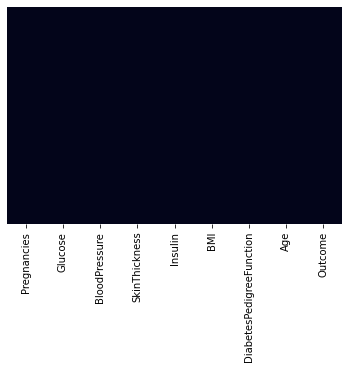

In [150]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [151]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 It's Look Like We Don't Have Any Missing Value..

In [152]:
print("Total Number of 0 Present in Output",data[data.Outcome==0].shape[0])

Total Number of 0 Present in Output 500


In [153]:
print("Total Number of 1 Present in Output",data[data.Outcome==1].shape[0])

Total Number of 1 Present in Output 268


In [154]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

We Have 9 columns form this our target variable is "Outcome" and rest are input for the model

In [155]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [156]:
df=data.corr()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


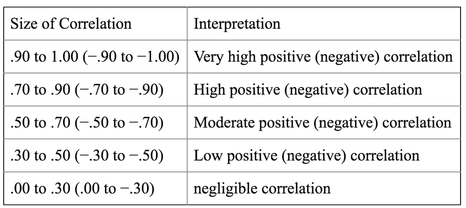

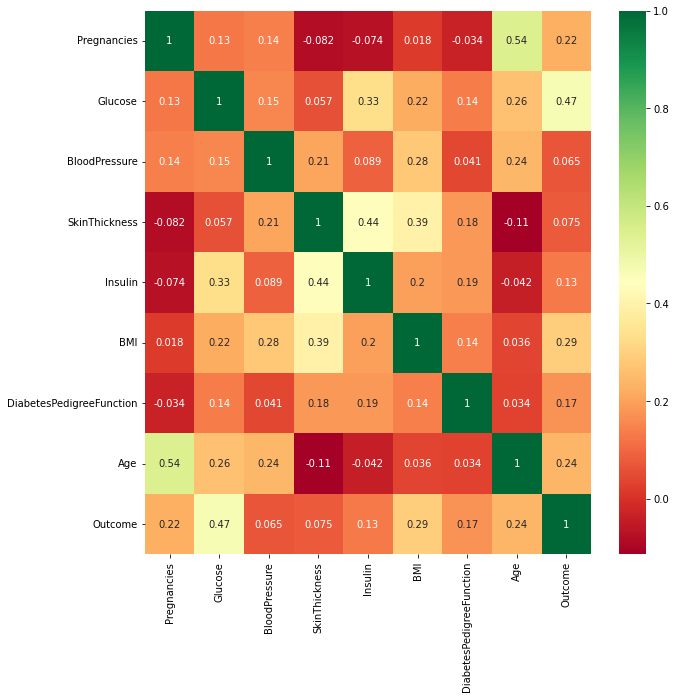

In [157]:
plt.figure(figsize=(10,10))
sns.heatmap(df,annot=True,cmap="RdYlGn")
plt.show()

## Summary Of HeatMap

i.>  OutComes is Highly Correlated Glucose And Averagely Correlated With BMI.

ii.> OutComes is less Correlated With BloodPressure And SkinThickness


<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

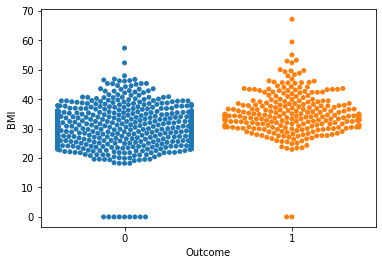

In [158]:
#Swarm Plot
sns.swarmplot(x=data['Outcome'],y=data['BMI'])

#### Swarm Plot Shows us that:-
i.> Most of the person BMI in a data set lies between 22-40

ii.> Person Whose BMI is greater than 42 is Having More Chances Of Diabetes.

<AxesSubplot:xlabel='Age', ylabel='Density'>

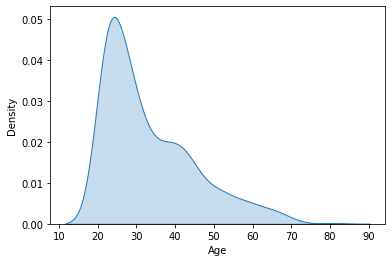

In [159]:
#KDE Plot
sns.kdeplot(x=data['Age'],shade=True)

#### Summary Of KDE Plot

i.> Most Of The People In our Data-set Are Having the Age Between 18-40

### Intially it's look like there is no NAN value but ,There are lot of 0 in a data-Set which is actually NaN Value in a Data-Set..
#### Let's Findout NAN(0) Value In a Data-Set

In [160]:
new_data=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI',
           'DiabetesPedigreeFunction','Age']]

In [161]:
Dict_For_Zero_Value=dict()
for i in new_data.columns:
    Dict_For_Zero_Value[i]=new_data[new_data[i]==0].shape[0]
Dict_For_Zero_Value

{'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11,
 'DiabetesPedigreeFunction': 0,
 'Age': 0}

We,Have So many 0 values in BloodPressure,SkinThickness and Insulin. Let's Fill out These value With median Value.

In [162]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(to_replace=0,
                                                    value=np.nan)

In [163]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [164]:
data['Glucose'].fillna(data.Glucose.median(),inplace=True)
data['BloodPressure'].fillna(data.BloodPressure.median(),inplace=True)
data['SkinThickness'].fillna(data.SkinThickness.median(),inplace=True)
data['Insulin'].fillna(data.Insulin.median(),inplace=True)
data['BMI'].fillna(data.BMI.median(),inplace=True)

In [167]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [168]:
#Let's Save the Updated Data
data.to_csv("After_EDA.csv")